# DATA 1010

### 28 September 2020: Optimization Methods
### Classtime problem set

In [1]:
using Plots

## Problem 1
Describe a method for cooking up a _mathematical_ function $f$ that could certainly not be correctly minimized, even approximately, by _any_ algorithm which is only able to interact with $f$ by querying its values at Float64-representable numbers.

## Problem 2

Suppose that instead of $[-1,1]^2$, the function is defined on $[-1,1]^{20}$. How many points would we need to cover this hypercube with the same grid spacing of 0.2 units between points in each coordinate axis direction?

## Problem 3

Apply gradient descent to _Himmelblau's function_, the same one we used in the pre-class video. Start at the point $[2, -2.5]$.

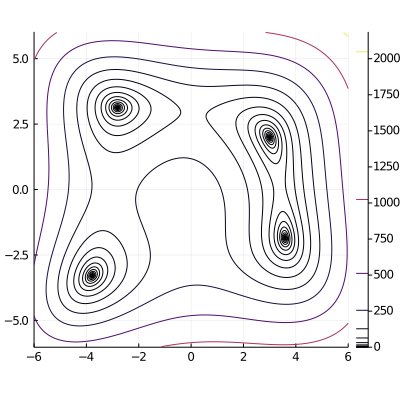

In [2]:
using Plots
default(ratio = 1, size = (400, 400))
f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
f(v) = f(v[1], v[2])
contour(-6:0.02:6, -6:0.02:6, f,
        levels = [2.0^k for k in -6:11])

## Problem 4

Apply gradient descent to the function. Start at the point $[1.2, -0.1]$. 

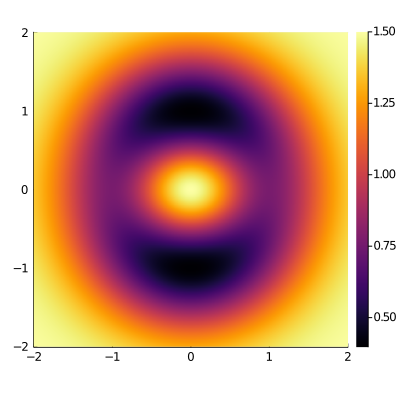

In [3]:
f(x,y) = 1.5-(2x^2+3y^2)*exp(-x^2-y^2)
default(ratio = 1, size = (400, 400))
heatmap(-2:0.01:2, -2:0.01:2, f)

# Convex optimization

## Problem 5

Sketch a convex set using your drawing tool. The collective goal as a class will be to have some variety in the types of shapes we choose.

## Problem 6

Suppose we have a local min for such a convex function $f$ on a convex domain and then a lower global min somewhere else. What could we do with those two points to demonstrate that the local min isn't really a local min after all?

## Problem 7

Use JuMP to find the line of best fit for the points $(1,2), (2,5)$ and $(4,5)$. 

In [ ]:
using JuMP, Ipopt

A = [1 2; 2 5; 4 5]
model = Model(with_optimizer(Ipopt.Optimizer, print_level=0))
@variable(model,m)
@variable(model,b)
@objective(model, Min, sum([(y - m*x - b)^2 for (x,y) in eachrow(A)]))
optimize!(model)
m1, b1 = JuMP.value(m), JuMP.value(b)

┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1278
┌ Info: Precompiling Ipopt [b6b21f68-93f8-5de0-b562-5493be1d77c9]
└ @ Base loading.jl:1278
